<a href="https://colab.research.google.com/github/kishuu007/data_science/blob/master/keras_sequence__text_image_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## sequence preparation
# pad_seq-->used to pad variable length seq
seq=[[2,4,5],
     [4],
     [1,2,3,6,7,9,5],
     [6,3]
     ]


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded=pad_sequences(seq,maxlen=None,dtype='int32',padding='pre',truncating='pre',value=0.0)
padded


array([[0, 0, 0, 0, 2, 4, 5],
       [0, 0, 0, 0, 0, 0, 4],
       [1, 2, 3, 6, 7, 9, 5],
       [0, 0, 0, 0, 0, 6, 3]], dtype=int32)

In [3]:
## skipgram-->tells how data is related to eachother
from tensorflow.keras.preprocessing.sequence import skipgrams
skipgrams(padded[0],vocabulary_size=6,window_size=1,negative_samples=1.0,shuffle=False,categorical=False,sampling_table=None,seed=None)
# 1 means occurs in the same window
# o represents the neg_samples which takes random words from vocabulary

([[2, 4], [4, 2], [4, 5], [5, 4], [4, 5], [4, 5], [5, 1], [2, 3]],
 [1, 1, 1, 1, 0, 0, 0, 0])

In [4]:
## Time series generator
# univariate one step problem
import numpy as np
from numpy import array
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
input_data=array([1,2,3,4,5,6,7,8,9,10])
target=array([0,1,5,27,83,54,28,34,57,78])
 # Time series generator
generator=TimeseriesGenerator(input_data,target,length=2,batch_size=1)
# length =2-->2 input data and assign this to a specific time step
# batch_size=1--> one batch
#nuber of samples
print('samples:%d' % len(generator))
#print each sample
for i in range(len(generator)):
  x,y=generator[i]
  print('%s=>%s' % (x,y))
len(generator)  

samples:8
[[1 2]]=>[5]
[[2 3]]=>[27]
[[3 4]]=>[83]
[[4 5]]=>[54]
[[5 6]]=>[28]
[[6 7]]=>[34]
[[7 8]]=>[57]
[[8 9]]=>[78]


8

In [5]:
# text preprocessing
text="""keras is a high level neural network API.
        keras keras"""

In [6]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
## splits the data or text  into a list of words(also called as tokens)
##the processing to splitting text into tokens is called tokenization
## by default this fun automatically does three things
# 1.split the words by space 2.filter out punctuation 3.coverts text into lowercase 
word=text_to_word_sequence(text,lower=True,split=' ')   
print(word)

['keras', 'is', 'a', 'high', 'level', 'neural', 'network', 'api', 'keras', 'keras']


In [7]:
vocab_size=len(word)
vocab_size

10

In [8]:
text_to_word_sequence(text,filters='#',lower=True,split=' ')
# filters --> ignores the new line 

['keras',
 'is',
 'a',
 'high',
 'level',
 'neural',
 'network',
 'api.\n',
 'keras',
 'keras']

In [9]:
from tensorflow.keras.preprocessing.text import one_hot
## one_hot is used to tokenize an integer encoded text doc in one step
one_hot(text,n=vocab_size*1.25,lower=True,split=' ')
# n=minimize the no of collisions   

[8.0, 3.5, 9.0, 2.5, 8.5, 11.5, 2.5, 8.0, 8.0, 8.0]

In [10]:
from tensorflow.keras.preprocessing.text import hashing_trick
hashing_trick(text,n=vocab_size*1.25,hash_function='md5')

[3.0, 7.0, 6.5, 4.0, 2.5, 5.0, 9.0, 10.0, 3.0, 3.0]

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk=Tokenizer()
tk.fit_on_texts(word)

In [12]:
print(tk.word_counts)
print(tk.document_count)
print(tk.index_word)
print(tk.word_docs)



OrderedDict([('keras', 3), ('is', 1), ('a', 1), ('high', 1), ('level', 1), ('neural', 1), ('network', 1), ('api', 1)])
10
{1: 'keras', 2: 'is', 3: 'a', 4: 'high', 5: 'level', 6: 'neural', 7: 'network', 8: 'api'}
defaultdict(<class 'int'>, {'keras': 3, 'is': 1, 'a': 1, 'high': 1, 'level': 1, 'neural': 1, 'network': 1, 'api': 1})


In [13]:
seq=tk.texts_to_sequences((word))
seq

[[1], [2], [3], [4], [5], [6], [7], [8], [1], [1]]

In [14]:
encoded_docs=tk.texts_to_matrix(word,mode='count')
encoded_docs

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
# Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd

In [16]:
#loading MNIST data set
(x_train,y_train),(x_test,y_test)=mnist.load_data()

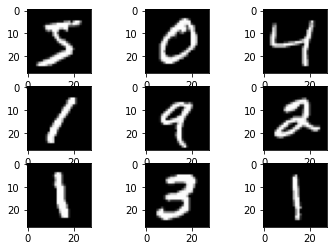

In [17]:
from matplotlib import pyplot
for i in range(0,9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(x_train[i],cmap='gray')
pyplot.show()

In [18]:
# reshape to be [samples],[widths],[heights],[channel]
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))
# we reshape our trainig and test data so that we will be able to fit those for imagedatagenerator

In [19]:
# covert from int to float--> because default type is float32
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [20]:
ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)

In [23]:
# data generation--> generate data and fit  training data on it
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
# image 1st flips horizontally and then vertically
# fit train data
datagen.fit(x_train)

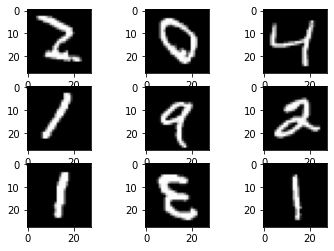

In [26]:
 # configure batch_size and retrive one batch of images
for x_batch,y_batch in datagen.flow(x_train,y_train,shuffle=False,batch_size=9):
  # create a grid of 3*3 images
   for i in range(0,9):
       pyplot.subplot(330+1+i)
       pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
   #show the plot  
   pyplot.show()
   break
   ##fliped image preprocessing is very imp for photograph of object in a scene to have a valid orientation
   